# Problem- 1)

Predict turbine energy yield (TEY) using ambient variables as features.

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine.

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean

Ambient temperature (AT) C â€“6.23 37.10 17.71

Ambient pressure (AP) mbar 985.85 1036.56 1013.07

Ambient humidity (AH) (%) 24.08 100.20 77.87

Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

Turbine after temperature (TAT) C 511.04 550.61 546.16

Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

Turbine energy yield (TEY) MWH 100.02 179.50 133.51

Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import keras
from sklearn.preprocessing import StandardScaler

In [3]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [4]:
gas_turbs= pd.read_csv('gas_turbines.csv')
gas_turbs

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [5]:
gas_turbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
gas_turbs.duplicated().value_counts()

False    15039
dtype: int64

In [7]:
gas_turbs.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


# Standardizing Data

In [8]:
std=StandardScaler()
gas_turbstd=gas_turbs.copy()
std.fit_transform(gas_turbstd)

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [9]:
gas_turbstd=pd.DataFrame(std.fit_transform(gas_turbstd),columns=gas_turbs.columns)
gas_turbstd

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


# Splitting Data

In [10]:
x=gas_turbstd.drop('TEY',axis=1)
y=gas_turbstd['TEY']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((10076, 10), (4963, 10), (10076,), (4963,))

# Tuning of Hyperparameters:

#### Batch Size

#### Epochs

In [12]:
# libs

import tensorflow
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#optimizers
from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam

In [13]:
#model def creation
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [14]:
#model
model=KerasClassifier(build_fn=create_model,verbose=0)
#hyper param 
batch_size=[20,40]
epochs=[100,200]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START batch_size=20, epochs=100...................................
[CV 1/5; 1/4] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.4min
[CV 2/5; 1/4] START batch_size=20, epochs=100...................................
[CV 2/5; 1/4] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.4min
[CV 3/5; 1/4] START batch_size=20, epochs=100...................................
[CV 3/5; 1/4] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.4min
[CV 4/5; 1/4] START batch_size=20, epochs=100...................................
[CV 4/5; 1/4] END ....batch_size=20, epochs=100;, score=0.000 total time= 2.4min
[CV 5/5; 1/4] START batch_size=20, epochs=100...................................
[CV 5/5; 1/4] END ....batch_size=20, epochs=100;, score=0.000 total time= 1.7min
[CV 1/5; 2/4] START batch_size=20, epochs=200...................................
[CV 1/5; 2/4] END ....batch_size=20, epochs=200;,

In [15]:
#summarizing results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with:{}'.format(mean,stdev,param))

Best:0.0,using{'batch_size': 20, 'epochs': 100}
0.0,0.0 with:{'batch_size': 20, 'epochs': 100}
0.0,0.0 with:{'batch_size': 20, 'epochs': 200}
0.0,0.0 with:{'batch_size': 40, 'epochs': 100}
0.0,0.0 with:{'batch_size': 40, 'epochs': 200}


# Tuning of Hyperparameters: Learning rate and Drop out rate

In [16]:
from keras.layers import Dropout

#model def
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(8,input_dim=10,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(12,input_dim=8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
#grid search dictionary
param_grids=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  42.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  25.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  42.2s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  26.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=  42.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [17]:
#summarizing results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with:{}'.format(mean,stdev,param))

Best:0.0,using{'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with:{'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with:{'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with:{'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with:{'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with:{'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with:{'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with:{'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with:{'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with:{'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [18]:
#model def
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(8,input_dim=10,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(12,input_dim=8,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
#grid search dictionary
param_grids=dict(activation_function=activation_function,init=init)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  30.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  42.4s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  42.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  42.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=  42.5s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [19]:
# Summarizin results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00033255736343562603, using {'activation_function': 'linear', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'zero'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_function': 'linear', 'init': 'uniform'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_function': 'linear', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'zero'}


# Training model with optimum values of Hyperparameters

In [20]:
# Python program to define a function to compute accuracy score of model's predicted class  
  
# Defining a function which takes true values of the sample and values predicted by the model  
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [21]:
from sklearn.metrics import classification_report, accuracy_score

#model def
def create_model():
  model=Sequential()
  model.add(Dense(16,input_dim=10,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.3))
  model.add(Dense(4,input_dim=16,kernel_initializer='uniform',activation='tanh'))
  model.add(Dropout(0.3))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.1)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=5000,epochs=100)
#model fit
model.fit(x,y)
#prediction on train 
y_pred=model.predict(x)
#printing mertics
compute_accuracy(y,y_pred)

470/470 [==============================] - 1s 2ms/step


6.649378283130527e-05

In [22]:
def forBestParams(x_train, y_train, x_test, y_test):

    # Defining list of hyperparameters
    batch_size_list = [500 , 1000 , 1500 , 2000 ]
    epoch_list      = [50 , 100 , 150 , 200]
           
    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model
            model = Sequential()
            
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            
            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
forBestParams(x_train, y_train, x_test, y_test)

batch_size: 500 - epochs: 50 Accuracy: 0.0
batch_size: 500 - epochs: 100 Accuracy: 0.0
batch_size: 500 - epochs: 150 Accuracy: 0.0
batch_size: 500 - epochs: 200 Accuracy: 0.0
batch_size: 1000 - epochs: 50 Accuracy: 0.0
batch_size: 1000 - epochs: 100 Accuracy: 0.0
batch_size: 1000 - epochs: 150 Accuracy: 0.0
batch_size: 1000 - epochs: 200 Accuracy: 0.0
batch_size: 1500 - epochs: 50 Accuracy: 0.0
batch_size: 1500 - epochs: 100 Accuracy: 0.0
batch_size: 1500 - epochs: 150 Accuracy: 0.0
batch_size: 1500 - epochs: 200 Accuracy: 0.0
batch_size: 2000 - epochs: 50 Accuracy: 0.0
batch_size: 2000 - epochs: 100 Accuracy: 0.0
batch_size: 2000 - epochs: 150 Accuracy: 0.0
batch_size: 2000 - epochs: 200 Accuracy: 0.0


# MLP Regressor

In [23]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(30,30))
mlp.fit(x_train,y_train)
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error
rs1=r2_score(y_train,pred_train)
mse1=mean_squared_error(y_train,pred_train)
rs1,mse1

(0.9978801188740483, 0.0021161693531286494)

In [25]:
rs2=r2_score(y_test,pred_test)
mse2=mean_squared_error(y_train,pred_train)
rs2,mse2

(0.997774074896175, 0.0021161693531286494)

In [26]:
!pip install keras 
!pip install tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
model=Sequential()
model.add(Dense(15,input_dim=10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["mean_squared_error"])

In [29]:
history=model.fit(x,y,validation_split=0.33,epochs=250,batch_size=10)
scores=model.evaluate(x,y)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))
history.history.keys()

Epoch 1/250
1008/1008 [==============================] - 4s 4ms/step - loss: -1322809.5000 - mean_squared_error: 0.5791 - val_loss: -1495410.5000 - val_mean_squared_error: 0.6451
Epoch 2/250
1008/1008 [==============================] - 3s 3ms/step - loss: -1333214.0000 - mean_squared_error: 0.5792 - val_loss: -1507171.0000 - val_mean_squared_error: 0.6451
Epoch 3/250
1008/1008 [==============================] - 6s 6ms/step - loss: -1343672.8750 - mean_squared_error: 0.5791 - val_loss: -1518925.7500 - val_mean_squared_error: 0.6451
Epoch 4/250
1008/1008 [==============================] - 8s 8ms/step - loss: -1354134.2500 - mean_squared_error: 0.5792 - val_loss: -1530699.5000 - val_mean_squared_error: 0.6451
Epoch 5/250
1008/1008 [==============================] - 7s 7ms/step - loss: -1364650.8750 - mean_squared_error: 0.5791 - val_loss: -1542620.2500 - val_mean_squared_error: 0.6451
Epoch 6/250
1008/1008 [==============================] - 7s 7ms/step - loss: -1375200.7500 - mean_squared

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

# Conclusion

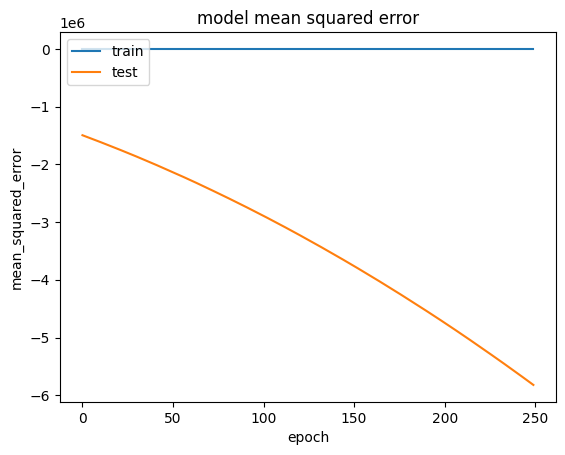

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history["mean_squared_error"])
plt.plot(history.history["val_loss"])
plt.title("model mean squared error")
plt.ylabel("mean_squared_error")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

###### We obtained the best possible and acceptable accuracy with the MLP regressor.

# Problem- 2)

In [31]:
from google.colab import files
uploaded= files.upload()

Saving forestfires (1).csv to forestfires (1).csv


In [33]:
forestfires= pd.read_csv('forestfires (1).csv')
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [34]:
forestfires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [35]:
forestfires.duplicated().value_counts()

False    509
True       8
dtype: int64

In [36]:
forestfires[forestfires.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [37]:
#Droping duplicated records from dataset
ffires_nodup=forestfires.copy()
ffires_nodup=forestfires.drop_duplicates().reset_index()
ffires_nodup=ffires_nodup.drop('index',axis=1)
ffires_nodup

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
505,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
506,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
507,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [38]:
ffires_nodup.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,90.618075,110.235756,547.787623,9.023576,18.865422,44.253438,4.011395,0.020432,12.992908,0.163065,...,0.017682,0.039293,0.003929,0.062868,0.031434,0.104126,0.003929,0.001965,0.029470,0.337917
std,5.555527,63.804112,248.196222,4.585083,5.841083,16.365192,1.800926,0.296261,64.133357,0.369788,...,0.131921,0.194482,0.062622,0.242965,0.174660,0.305724,0.062622,0.044324,0.169285,0.473466
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,62.300000,437.700000,6.400000,15.400000,32.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.610000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,141.300000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.580000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Label Encoding

In [39]:
from sklearn import preprocessing

ffires_lab=ffires_nodup.copy()
for i, column in enumerate(ffires_lab[[feature for feature in ffires_lab.columns if ffires_lab[feature].dtypes == 'O']].columns, 1):
  label_encoder=preprocessing.LabelEncoder()
  ffires_lab[column]=label_encoder.fit_transform(ffires_lab[column])
ffires_lab

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
505,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
506,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
507,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Standardizing Data

In [40]:
std=StandardScaler()
ffires_std=ffires_lab.copy()
std.fit_transform(ffires_std)

array([[ 2.71858196e-01, -1.42449474e+00, -7.96039810e-01, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01],
       [ 9.58019296e-01,  1.17804590e+00, -3.25665522e-03, ...,
         5.73875712e+00, -7.14412875e-01,  6.09891511e-01],
       [ 9.58019296e-01, -3.83478484e-01, -3.25665522e-03, ...,
         5.73875712e+00, -7.14412875e-01,  6.09891511e-01],
       ...,
       [-1.10046400e+00,  1.37029645e-01, -1.62485856e+00, ...,
        -1.74253759e-01, -7.14412875e-01, -1.63963587e+00],
       [-1.10046400e+00, -3.83478484e-01,  6.81419706e-01, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01],
       [ 7.29298930e-01,  1.17804590e+00, -2.00323234e+00, ...,
        -1.74253759e-01, -7.14412875e-01,  6.09891511e-01]])

In [41]:
ffires_std=pd.DataFrame(std.fit_transform(ffires_std),columns=ffires_lab.columns)
ffires_std

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.271858,-1.424495,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,0.609892
1,0.958019,1.178046,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,0.609892
2,0.958019,-0.383478,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,0.609892
3,0.271858,-1.424495,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,0.609892
4,0.271858,0.137030,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,0.609892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,-1.639636
505,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,-1.639636
506,-1.100464,0.137030,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,-1.639636
507,-1.100464,-0.383478,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0.609892


# Data Splitting

In [42]:
x=ffires_std.drop('size_category',axis=1)
y=ffires_std['size_category']

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((341, 30), (168, 30), (341,), (168,))

# Tuning of Hyperparameters:

###### Batch Size

###### Epochs

In [45]:
# libs
import tensorflow
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#optimizers
from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam

In [46]:
#model def creation
def create_model():
    model = Sequential(name='Hypterparameter-Tuning-Dummy')
    model.add(Dense(12, input_dim=30, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [47]:
#model
model=KerasClassifier(build_fn=create_model,verbose=0)
#hyper param 
batch_size=[10,20]
epochs=[10,20,50]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START batch_size=10, epochs=10....................................
[CV 1/5; 1/6] END .....batch_size=10, epochs=10;, score=0.980 total time=   2.8s
[CV 2/5; 1/6] START batch_size=10, epochs=10....................................
[CV 2/5; 1/6] END .....batch_size=10, epochs=10;, score=0.863 total time=   2.2s
[CV 3/5; 1/6] START batch_size=10, epochs=10....................................
[CV 3/5; 1/6] END .....batch_size=10, epochs=10;, score=0.824 total time=   2.6s
[CV 4/5; 1/6] START batch_size=10, epochs=10....................................
[CV 4/5; 1/6] END .....batch_size=10, epochs=10;, score=0.853 total time=   3.9s
[CV 5/5; 1/6] START batch_size=10, epochs=10....................................
[CV 5/5; 1/6] END .....batch_size=10, epochs=10;, score=0.911 total time=   2.9s
[CV 1/5; 2/6] START batch_size=10, epochs=20....................................
[CV 1/5; 2/6] END .....batch_size=10, epochs=20;,

# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [48]:
from keras.layers import Dropout

#model def
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(8,input_dim=30,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(12,input_dim=8,kernel_initializer='normal',activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
learning_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
#grid search dictionary
param_grids=dict(learning_rate=learning_rate,dropout_rate=dropout_rate)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   3.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.765 total time=   2.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.657 total time=   2.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.814 total time=   4.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.743 total time=   2.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=1.000 total time=   2.6s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 2/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.833 total time=   3.9s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 3/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.882 total time=   3.9s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 4/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.902 total time=   2.7s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 5/5; 2/9] END dropout_rate=0.0, learning_rate=0.01;, score=0.861 total time=   2.6s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1...........

In [49]:
#summarizing results
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print('{},{} with:{}'.format(mean,stdev,param))

Best:0.9135507583618164,using{'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7955736756324768,0.11412457311495978 with:{'dropout_rate': 0.0, 'learning_rate': 0.001}
0.895806634426117,0.05685564239197079 with:{'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9075907468795776,0.04254042455043982 with:{'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7760240793228149,0.09871653918933225 with:{'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9135507583618164,0.04819742500824427 with:{'dropout_rate': 0.1, 'learning_rate': 0.01}
0.8072412967681885,0.05788024945082707 with:{'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7799456477165222,0.12162512051227727 with:{'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8977868318557739,0.06041675809900803 with:{'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8252378106117249,0.15793611809722202 with:{'dropout_rate': 0.2, 'learning_rate': 0.1}


# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [50]:
#model def
def create_model(activation_function,init):
  model=Sequential()
  model.add(Dense(8,input_dim=30,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(12,input_dim=8,kernel_initializer=init,activation=activation_function))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
activation_function=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
#grid search dictionary
param_grids=dict(activation_function=activation_function,init=init)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=1.000 total time=   4.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.765 total time=   4.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.510 total time=   2.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.676 total time=   4.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.693 total time=   4.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [51]:
# Summarizin results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8684138894081116, using {'activation_function': 'tanh', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7897495746612548,0.11160722683257511 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7917879939079284,0.11466821034943685 with: {'activation_function': 'relu', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'relu', 'init': 'zero'}
0.8684138894081116,0.07024516366215812 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8486895680427551,0.07514706482859035 with: {'activation_function': 'tanh', 'init': 'normal'}
0.728809940814972,0.1592563941055272 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8526305437088013,0.07155342736788599 with: {'activation_functio

# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [52]:
#model def
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=30,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(neuron2,input_dim=neuron1,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.001)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
#grid search params
neuron1=[4,8,16]
neuron2=[2,4,8]
#grid search dictionary
param_grids=dict(neuron1=neuron1,neuron2=neuron2)

#gridsearch cv fit
grid=GridSearchCV(estimator=model,param_grid=param_grids,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.990 total time=   4.0s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.765 total time=   3.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.696 total time=   2.9s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.716 total time=   3.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.733 total time=   2.6s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [53]:
# Summarizing the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8742768168449402, using {'neuron1': 16, 'neuron2': 8}
0.7798679828643799,0.10755008868130986 with: {'neuron1': 4, 'neuron2': 2}
0.7917103409767151,0.10279272170640003 with: {'neuron1': 4, 'neuron2': 4}
0.8192001581192017,0.08617592702471132 with: {'neuron1': 4, 'neuron2': 8}
0.8034750580787658,0.09397534745627452 with: {'neuron1': 8, 'neuron2': 2}
0.8349640846252442,0.0807131153798453 with: {'neuron1': 8, 'neuron2': 4}
0.8546301603317261,0.07318133528588279 with: {'neuron1': 8, 'neuron2': 8}
0.8231799602508545,0.0887810260405273 with: {'neuron1': 16, 'neuron2': 2}
0.8605513334274292,0.07314125836265385 with: {'neuron1': 16, 'neuron2': 4}
0.8742768168449402,0.0657113161238888 with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of Hyperparameters

In [54]:
# Python program to define a function to compute accuracy score of model's predicted class  
  
# Defining a function which takes true values of the sample and values predicted by the model  
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [55]:
from sklearn.metrics import classification_report, accuracy_score
#model def
def create_model():
  model=Sequential()
  model.add(Dense(16,input_dim=30,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(4,input_dim=16,kernel_initializer='uniform',activation='linear'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))

  adam=Adam(learning_rate=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
  return model

#model creation
model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=20,epochs=50)
#model fit
model.fit(x,y)
#prediction on train 
y_pred=model.predict(x)
#printing mertics
compute_accuracy(y,y_pred)

16/16 [==============================] - 0s 2ms/step


0.9705304518664047

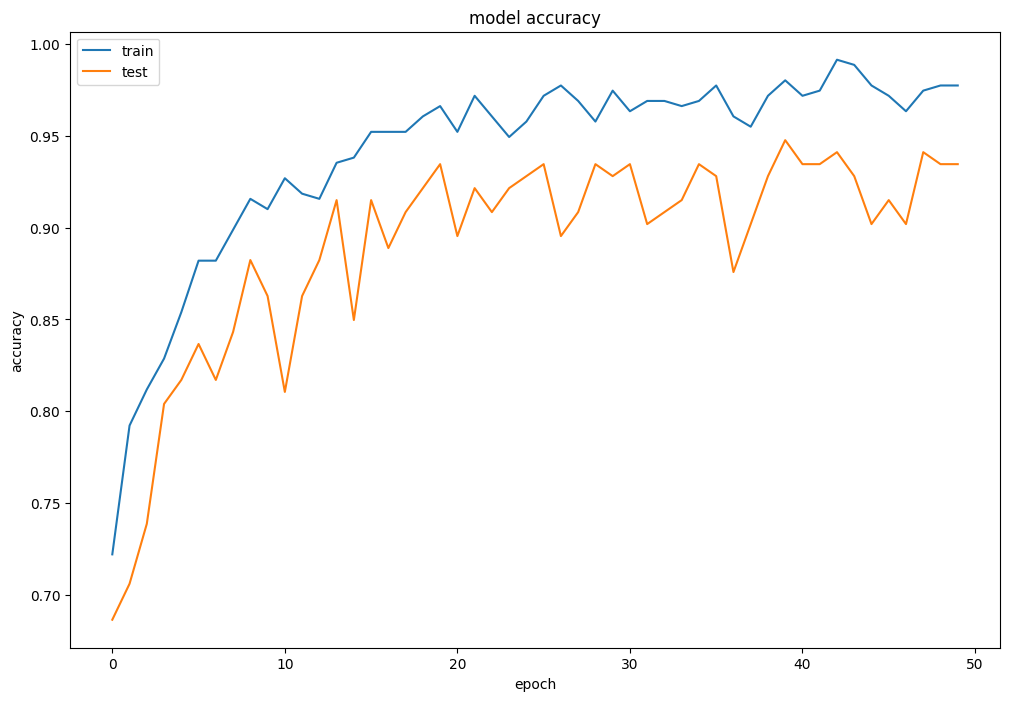

In [56]:
#final plot with accuracy of train and test
history = model.fit(x,y,validation_split = 0.3, epochs=50, batch_size=20)
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# MLP Regressor

In [57]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(30,30))
mlp.fit(x_train,y_train)
pred_train=mlp.predict(x_train)
pred_test=mlp.predict(x_test)

In [58]:
from sklearn.metrics import r2_score, mean_squared_error

rs1=r2_score(y_train,pred_train)
mse1=mean_squared_error(y_train,pred_train)
rs1,mse1

(0.8408248458579876, 0.15868514177871332)

In [59]:
rs2=r2_score(y_test,pred_test)
mse2=mean_squared_error(y_train,pred_train)
rs2,mse2

(0.17814418285565525, 0.15868514177871332)

In [60]:
!pip install keras 
!pip install tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
model=Sequential()
model.add(Dense(15,input_dim=30,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["mean_squared_error"])

In [62]:
history=model.fit(x,y,validation_split=0.33,epochs=250,batch_size=10)
scores=model.evaluate(x,y)
print("%s: %.2f%%"%(model.metrics_names[1],scores[1]*100))
history.history.keys()

Epoch 1/250
35/35 [==============================] - 1s 12ms/step - loss: 1.0442 - mean_squared_error: 1.2670 - val_loss: 1.1655 - val_mean_squared_error: 1.6884
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: 0.8062 - mean_squared_error: 1.1712 - val_loss: 0.9719 - val_mean_squared_error: 1.6037
Epoch 3/250
35/35 [==============================] - 0s 5ms/step - loss: 0.6219 - mean_squared_error: 1.0891 - val_loss: 0.8246 - val_mean_squared_error: 1.5338
Epoch 4/250
35/35 [==============================] - 0s 4ms/step - loss: 0.4755 - mean_squared_error: 1.0211 - val_loss: 0.6877 - val_mean_squared_error: 1.4684
Epoch 5/250
35/35 [==============================] - 0s 5ms/step - loss: 0.3671 - mean_squared_error: 0.9771 - val_loss: 0.5896 - val_mean_squared_error: 1.4234
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.2779 - mean_squared_error: 0.9466 - val_loss: 0.5014 - val_mean_squared_error: 1.3851
Epoch 7/250
35/35 [==============

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

# Conclusion

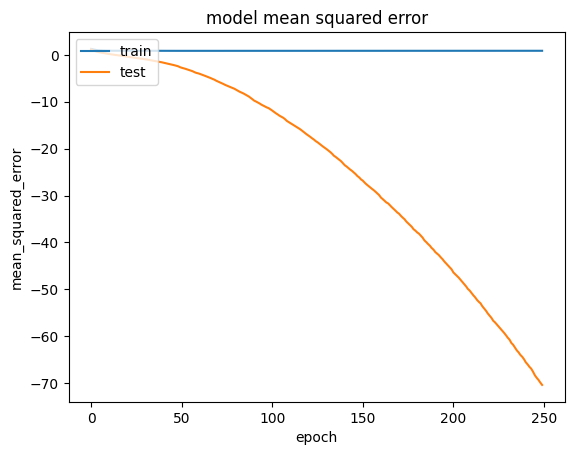

In [63]:
import matplotlib.pyplot as plt
plt.plot(history.history["mean_squared_error"])
plt.plot(history.history["val_loss"])
plt.title("model mean squared error")
plt.ylabel("mean_squared_error")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

We obtained the best possible and acceptable accuracy with the keras classifier.